In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data=pd.read_csv("train.csv")
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [37]:
data.shape

(156060, 4)

In [38]:
data=data.iloc[:1000,:]

In [39]:
data.shape

(1000, 4)

In [40]:
data['Sentiment'].value_counts()

Sentiment
2    670
1    139
3    139
4     37
0     15
Name: count, dtype: int64

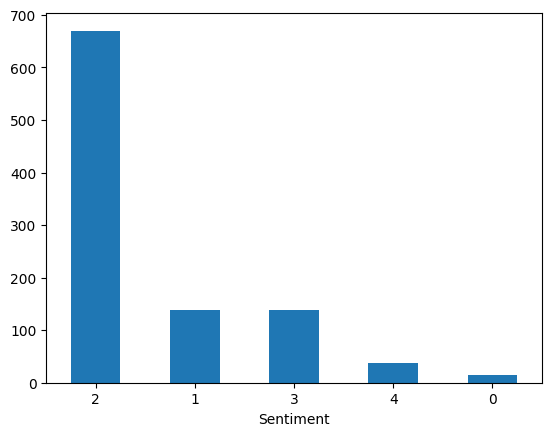

In [41]:
data['Sentiment'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

Text(0.5, 1.0, 'sentiment distribution')

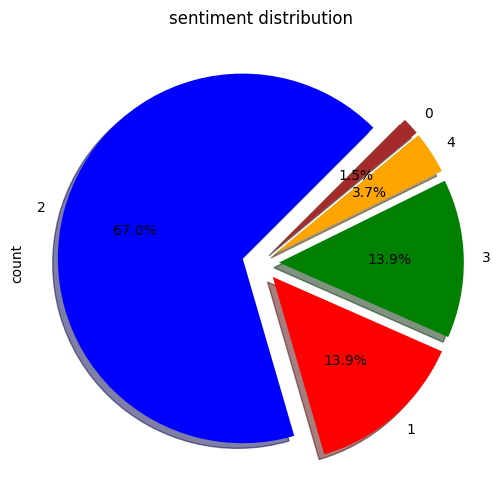

In [42]:
plt.figure(figsize=(10,6))
colors=["blue","red","green","orange","brown"]
data['Sentiment'].value_counts().plot(kind='pie',autopct='%.1f%%',shadow=True,
                                      colors=colors,startangle=45,explode = (0.1, 0.1, 0.1, 0.1, 0.1))
plt.title("sentiment distribution")

In [43]:
data["Phrase"][100]

'would have a hard time sitting through this one .'

In [ ]:
import re
import nltk


In [45]:
stopwords_set =set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

<>:2: SyntaxWarning: invalid escape sequence '\)'
<>:2: SyntaxWarning: invalid escape sequence '\)'
C:\Users\navas\AppData\Local\Temp\ipykernel_12696\80437975.py:2: SyntaxWarning: invalid escape sequence '\)'
  emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')


In [46]:
def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\W'
C:\Users\navas\AppData\Local\Temp\ipykernel_12696\4230295046.py:4: SyntaxWarning: invalid escape sequence '\W'
  text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')


In [47]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [48]:
data['Phrase'] = data['Phrase'].astype(str).apply(lambda x: preprocessing(x))


In [49]:
data['Phrase']

0      seri escapad demonstr adag good goos also good...
1                   seri escapad demonstr adag good goos
2                                                   seri
3                                                       
4                                                   seri
                             ...                        
995                                                 hero
996                                          horror movi
997                                          horror movi
998                                               horror
999                                            tri avoid
Name: Phrase, Length: 1000, dtype: object

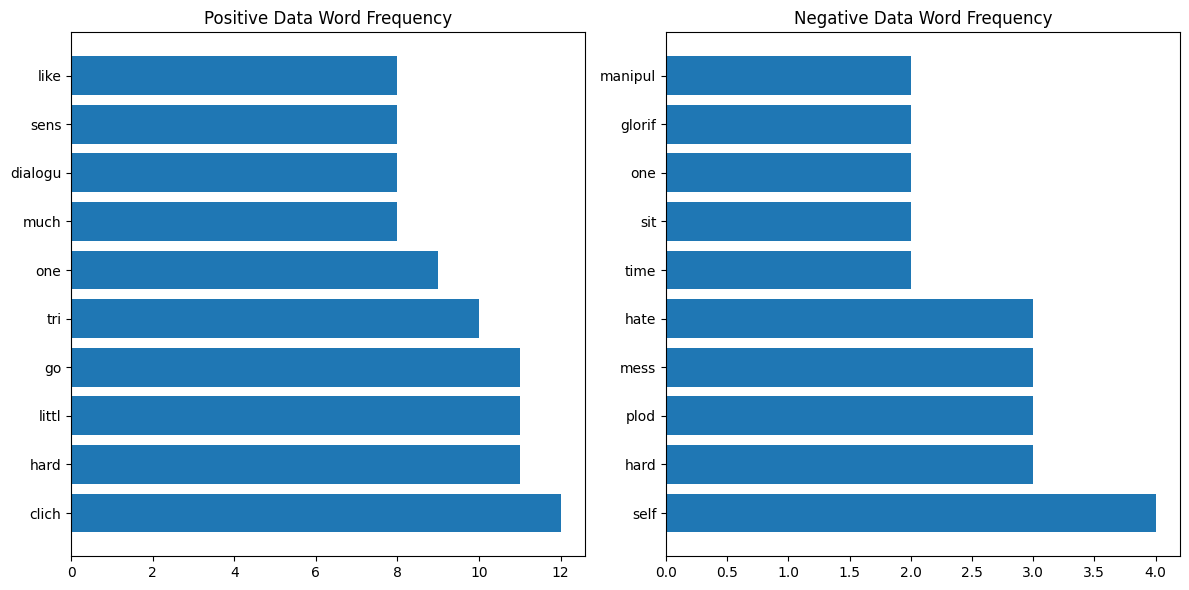

In [50]:
positivedata = data[data['Sentiment'] == 1]
positivedata = positivedata['Phrase']
negdata = data[data['Sentiment'] == 0]
negdata = negdata['Phrase']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

tfidf = TfidfVectorizer(
    stop_words=stop_words,
    lowercase=True,
    max_df=0.9,
    min_df=3,
    ngram_range=(1, 2),  # unigrams and bigrams
    max_features=10000
)

x = tfidf.fit_transform(data['Phrase'])
y = data['Sentiment'].values


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, stratify=y)
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1.0, max_iter=1000)
clf.fit(X_train, y_train)



LinearSVC()

In [53]:
from sklearn import metrics

y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))


Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.50      0.32      0.39        28
           2       0.79      0.90      0.84       134
           3       0.52      0.39      0.45        28
           4       0.50      0.29      0.36         7

    accuracy                           0.72       200
   macro avg       0.53      0.45      0.48       200
weighted avg       0.69      0.72      0.70       200



In [54]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [58]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



prediction = prediction("hate")

In [59]:
print(prediction)

0


In [60]:

if prediction == 0:
    print("Very Negative")
elif prediction == 1:
    print("Negative")
elif prediction == 2:
    print("Neutral")
elif prediction == 3:
    print("Positive")
elif prediction == 4:
    print("Very Positive")
else:
    print("Invalid sentiment score")


Very Negative
